# Обучение без учителя
Мы не знаем "правильный ответ" которому хотим научить модель.
-  Результат очень зависит от конкретного метода
-  Можно извлечь из данных новую для нас информацию
-  Можно применять для преобразования признаков

## Задача
Есть датасет с характеристиками нескольких вин. Мы хотим разбить все эти вина на группы (кластеры), основываясь на их характеристиках (кол-во флаваноидов, оттенок, процент алкоголя и т. д.). Поскольку мы не знаем, какое вино к какой категории относится (в данных нет этой информации), будем пытаться кластеризовать их с помощью алгоритма K-Means

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("/content/drive/MyDrive/АБД/Задания/6. Кластеризация/data/wine.csv")
data

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  
0     3.92     1065  
1     3.40     1050  
2     3.17     1185  
3     3.45     1480  
4     2.93      735  
..     ...      ...  
173   1.74      740  
174   1.56      750  
175   1.56      835  
176   1.62      840  
177   1.60      560  

[178 rows x 13 columns]

In [5]:
data.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


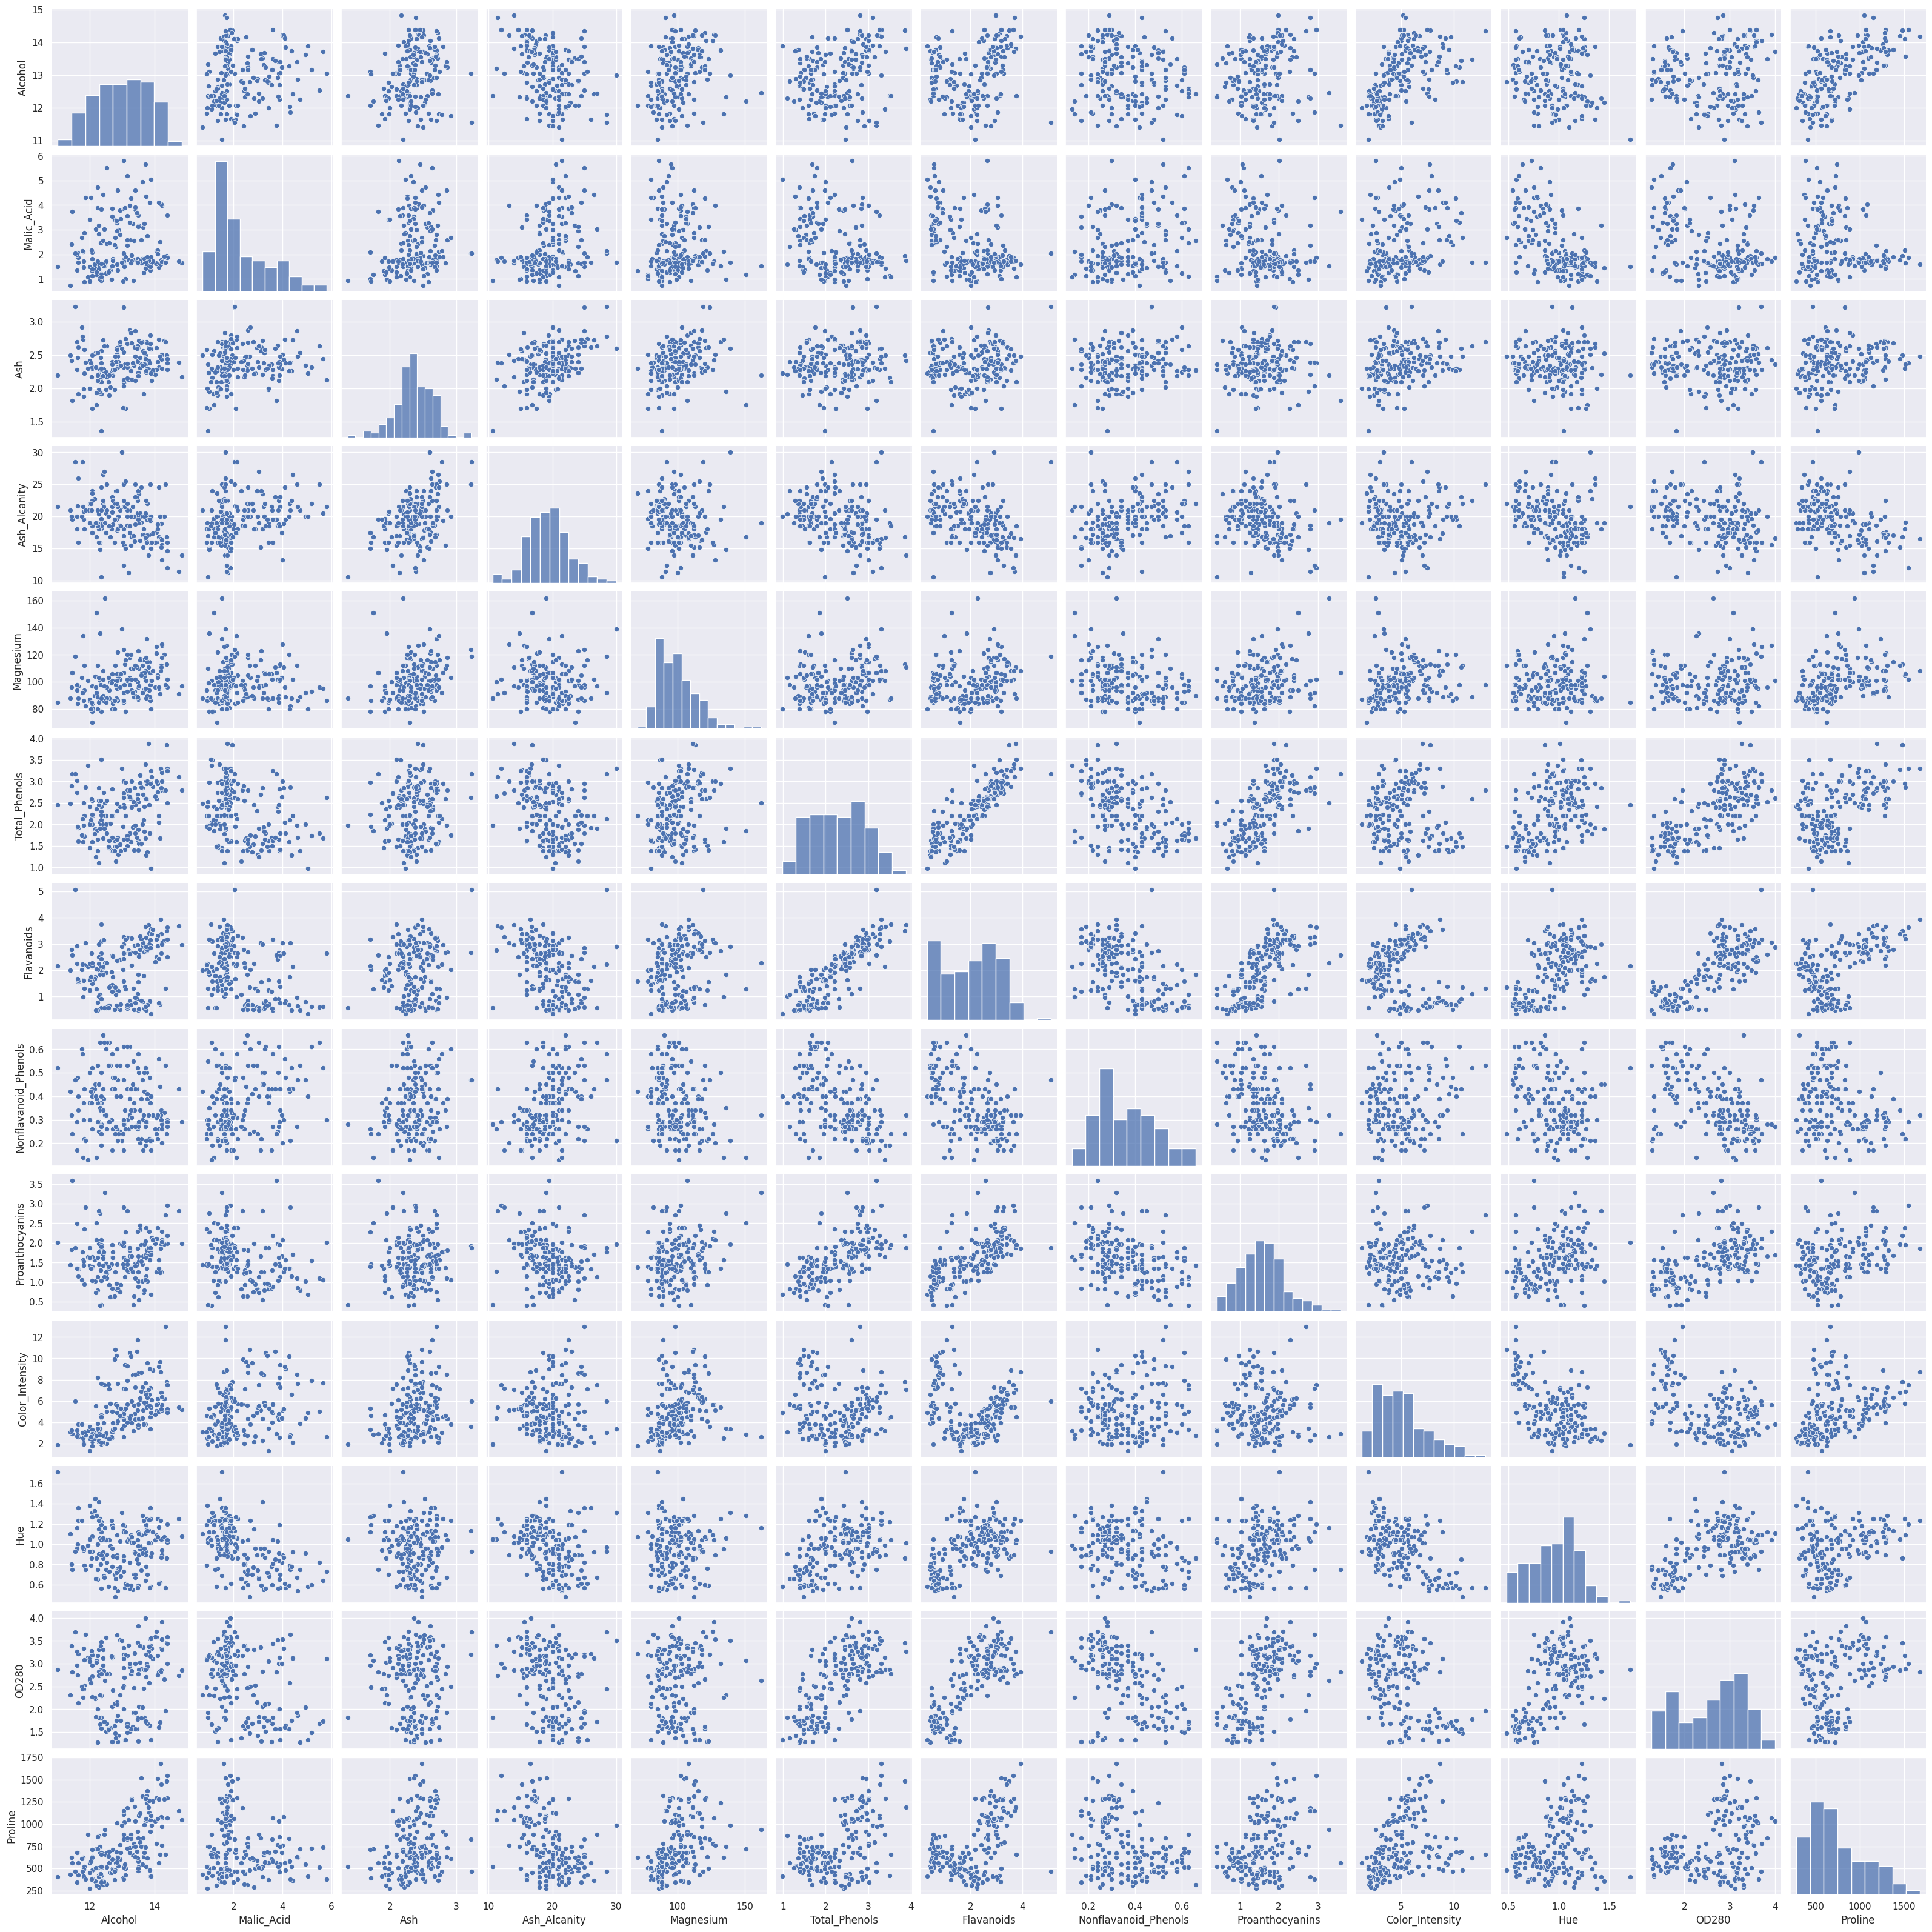

In [8]:
import seaborn as sns; sns.set()

sns.pairplot(data)

<Axes: >

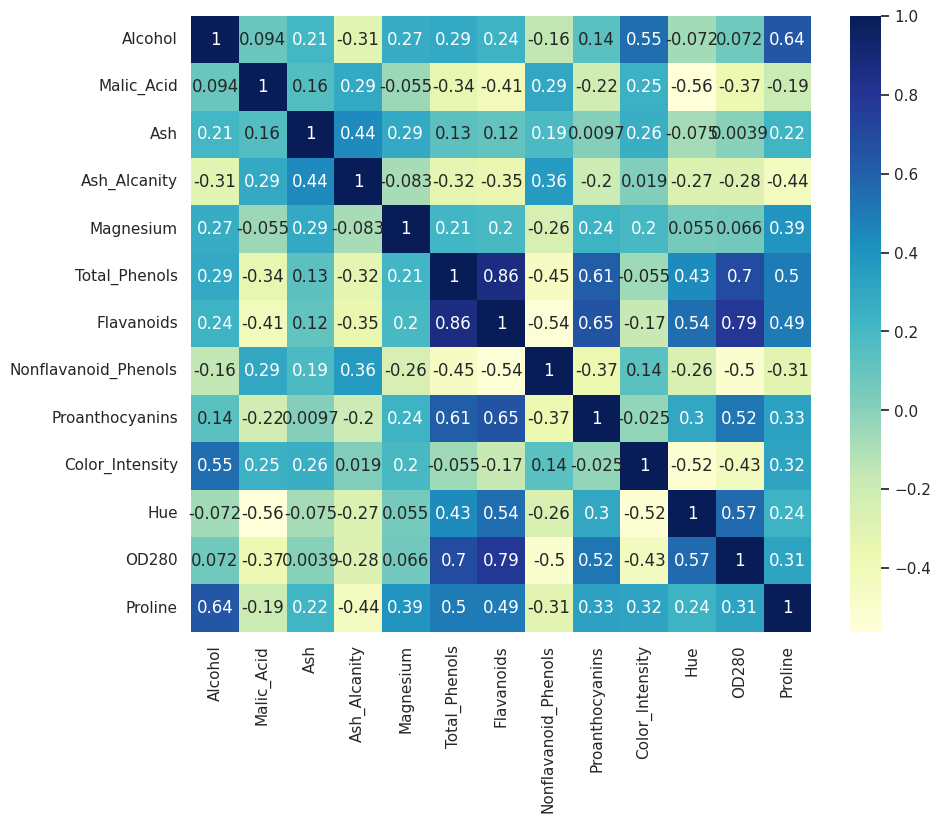

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(1, 0, 'Alcohol'),
  Text(2, 0, 'Malic_Acid'),
  Text(3, 0, 'Ash'),
  Text(4, 0, 'Ash_Alcanity'),
  Text(5, 0, 'Magnesium'),
  Text(6, 0, 'Total_Phenols'),
  Text(7, 0, 'Flavanoids'),
  Text(8, 0, 'Nonflavanoid_Phenols'),
  Text(9, 0, 'Proanthocyanins'),
  Text(10, 0, 'Color_Intensity'),
  Text(11, 0, 'Hue'),
  Text(12, 0, 'OD280'),
  Text(13, 0, 'Proline')])

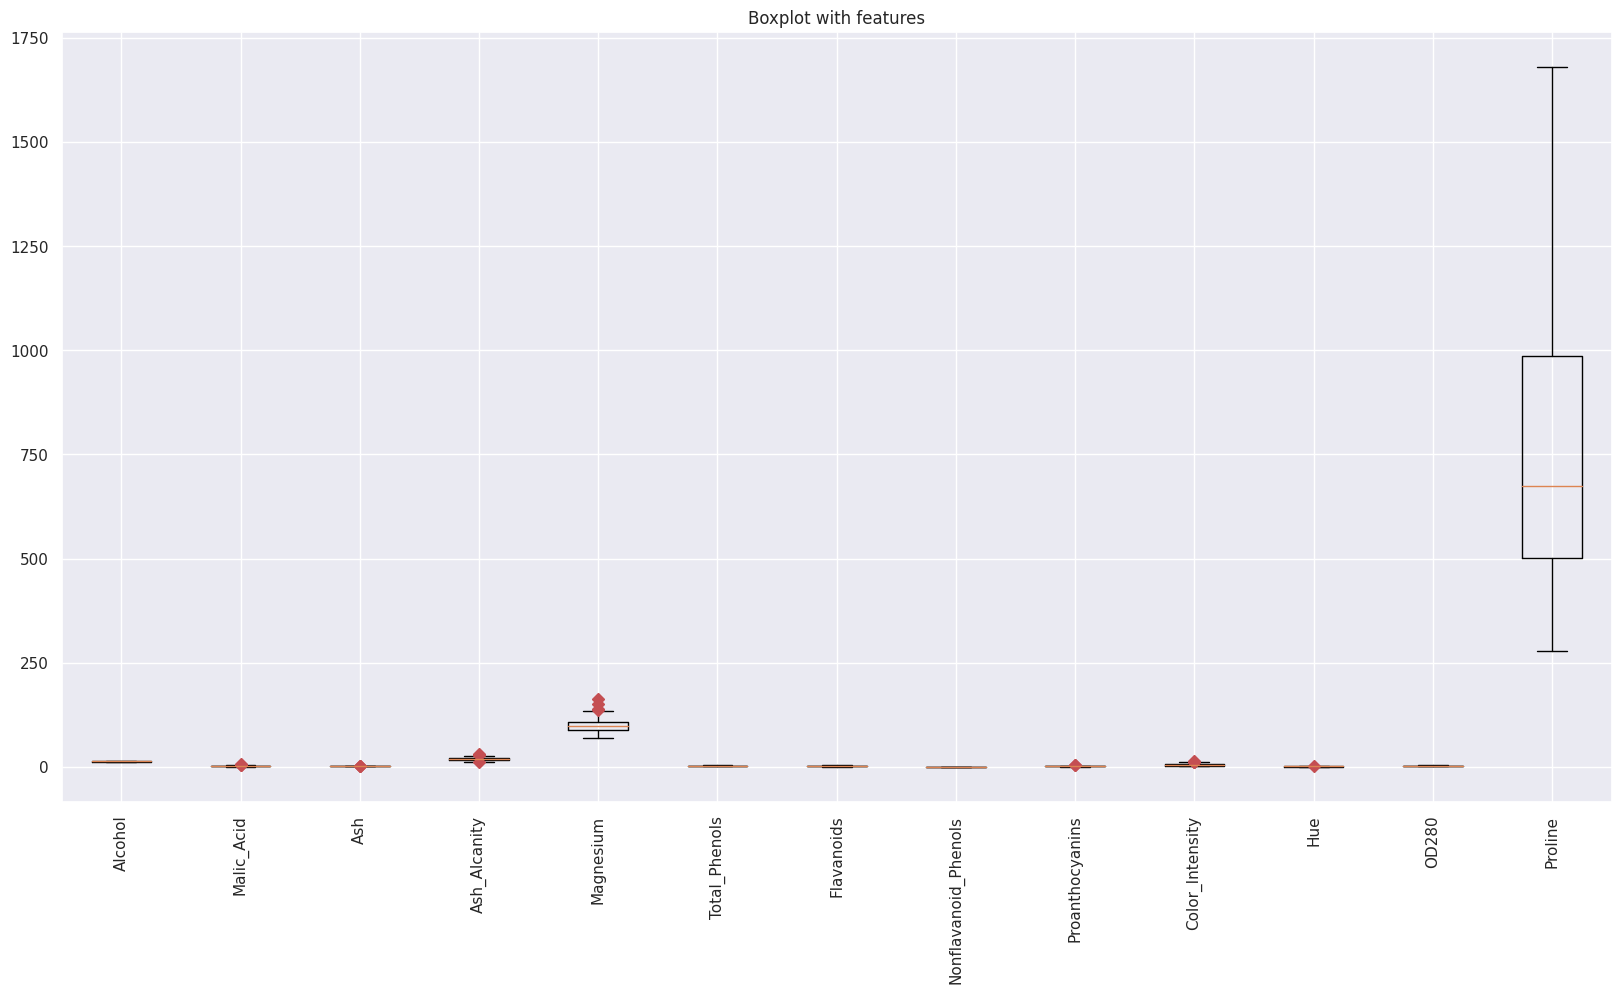

In [10]:
features = list(data.keys())

plt.figure(figsize=(20, 10))
plt.title('Boxplot with features')
plt.boxplot(data.values, 0, 'rD', labels = features)
plt.xticks(rotation = 90)

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data_scaled = sc.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    1.518613   -0.562250  0.232053     -1.169593   1.913905       0.808997   
1    0.246290   -0.499413 -0.827996     -2.490847   0.018145       0.568648   
2    0.196879    0.021231  1.109334     -0.268738   0.088358       0.808997   
3    1.691550   -0.346811  0.487926     -0.809251   0.930918       2.491446   
4    0.295700    0.227694  1.840403      0.451946   1.281985       0.808997   
..        ...         ...       ...           ...        ...            ...   
173  0.876275    2.974543  0.305159      0.301803  -0.332922      -0.985614   
174  0.493343    1.412609  0.414820      1.052516   0.158572      -0.793334   
175  0.332758    1.744744 -0.389355      0.151661   1.422412      -1.129824   
176  0.209232    0.227694  0.012732      0.151661   1.422412      -1.033684   
177  1.395086    1.583165  1.365208      1.502943  -0.262708      -0.392751   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0      1.034819             -0.659563         1.224884         0.251717   
1      0.733629             -0.820719        -0.544721        -0.293321   
2      1.215533             -0.498407         2.135968         0.269020   
3      1.466525             -0.981875         1.032155         1.186068   
4      0.663351              0.226796         0.401404        -0.319276   
..          ...                   ...              ...              ...   
173   -1.424900              1.274310        -0.930179         1.142811   
174   -1.284344              0.549108        -0.316950         0.969783   
175   -1.344582              0.549108        -0.422075         2.224236   
176   -1.354622              1.354888        -0.229346         1.834923   
177   -1.274305              1.596623        -0.422075         1.791666   

          Hue     OD280   Proline  
0    0.362177  1.847920  1.013009  
1    0.406051  1.113449  0.965242  
2    0.318304  0.788587  1.395148  
3   -0.427544  1.184071  2.334574  
4    0.362177  0.449601 -0.037874  
..        ...       ...       ...  
173 -1.392758 -1.231206 -0.021952  
174 -1.129518 -1.485445  0.009893  
175 -1.612125 -1.485445  0.280575  
176 -1.568252 -1.400699  0.296498  
177 -1.524378 -1.428948 -0.595160  

[178 rows x 13 columns]

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(1, 0, 'Alcohol'),
  Text(2, 0, 'Malic_Acid'),
  Text(3, 0, 'Ash'),
  Text(4, 0, 'Ash_Alcanity'),
  Text(5, 0, 'Magnesium'),
  Text(6, 0, 'Total_Phenols'),
  Text(7, 0, 'Flavanoids'),
  Text(8, 0, 'Nonflavanoid_Phenols'),
  Text(9, 0, 'Proanthocyanins'),
  Text(10, 0, 'Color_Intensity'),
  Text(11, 0, 'Hue'),
  Text(12, 0, 'OD280'),
  Text(13, 0, 'Proline')])

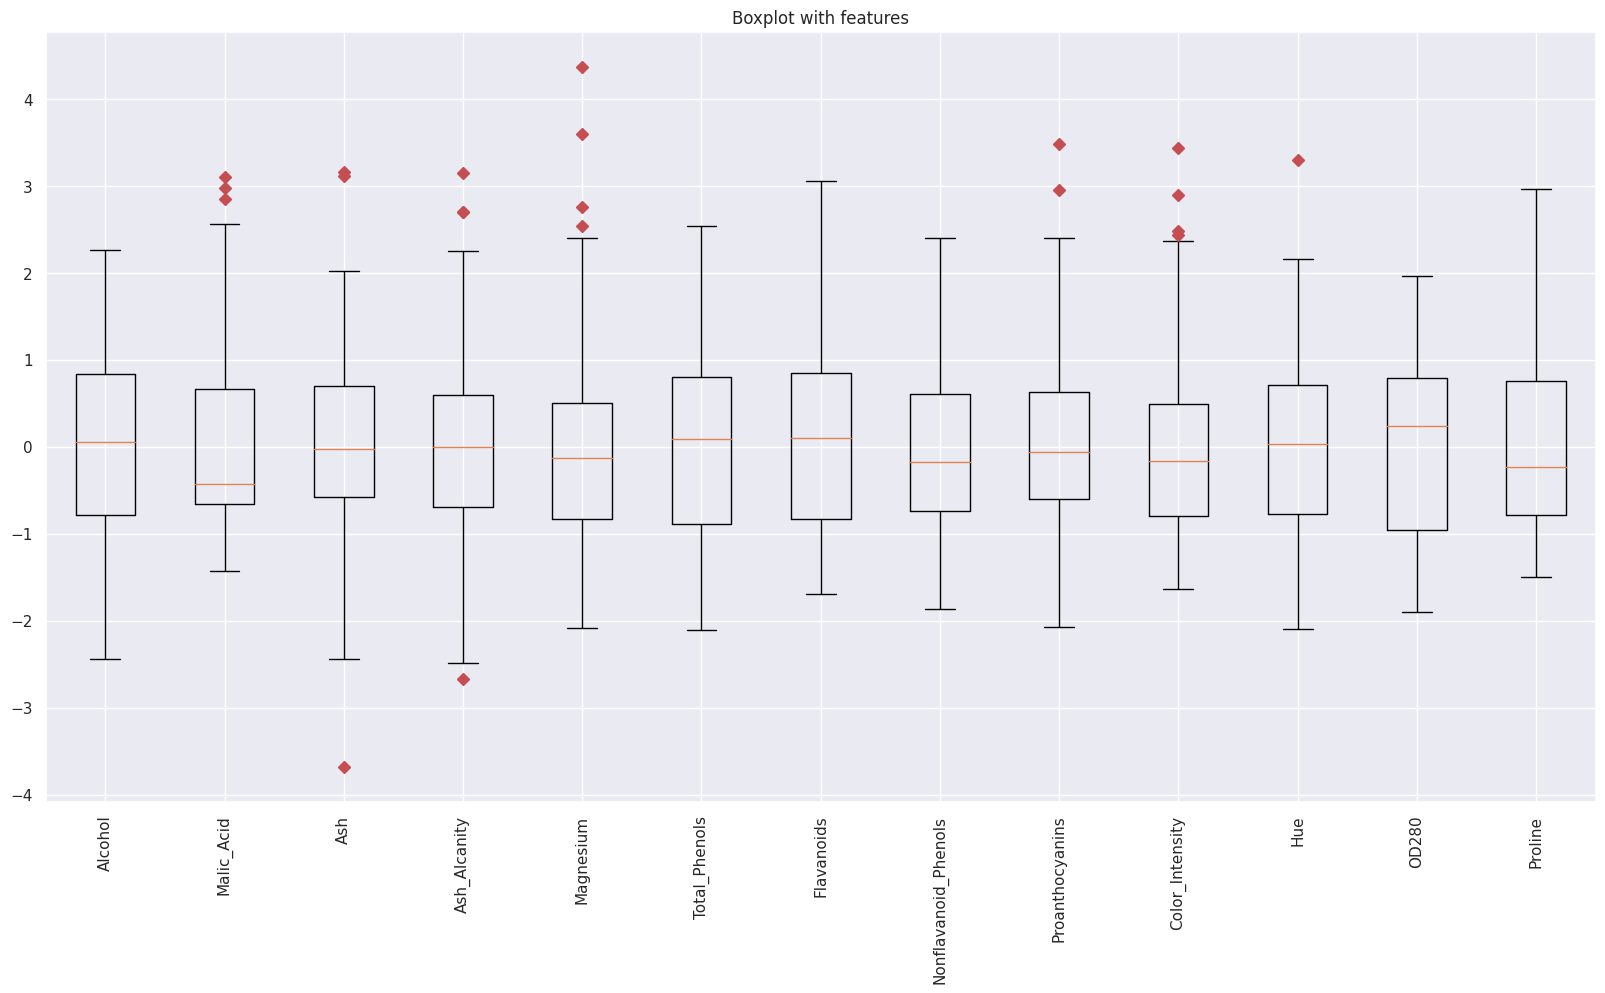

In [12]:
plt.figure(figsize=(20, 10))
plt.title('Boxplot with features')
plt.boxplot(data_scaled.values, 0, 'rD', labels = data_scaled.columns)
plt.xticks(rotation = 90)

# [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

K-Means — это алгоритм кластеризации, который пытается разбить набор точек на K наборов (кластеров) таким образом, чтобы точки в каждом кластере располагались рядом друг с другом. Это неконтролируемо, потому что точки не имеют внешней классификации.

Процедура нахождения центроидов:
1. Указывается кол-во кластеров (k). k центроидов выбираются из точек данных случайным образом или так, чтобы они помещались в данные в очень отдаленных друг от друга положениях. Все остальные точки присваиваются ближайшему к ним центроиду на основе евклидова расстояния.
2. Формируются начальные кластеры.
3. Кластеры пересчитываются до тех пор, пока решение больше не будет меняться. Центроиды пересчитываются как среднее значение всех точек, присутствующих в группе. Вс точки данных переназначаются группам в зависимости от расстояния до новых центроидов.

![](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif)

__Минус алгоритма:__ необходимо указать кол-во кластеров (а вы можете его не знать). Решение: метод локтя или силуэтный анализ.
Два слабых места алгоритма:
1. На 0-ой итерации центроиды выбираются случайным образом, а значит, вы можете начать с плохой начальной точки. В результате итеративный процесс остановится на каком-то маловероятном решении - например, расположении центроида между двумя группами. Чтобы убедиться, что ваше решение является наиболее близким к правде, опробуйте алогритм несколько раз и отследите результаты. Чем больше попыток, тем больше шансов подтвердить правильность вашего решения. Однако большее кол-во итераций требует и большего кол-ва времени.
2. Коррелляция между переменными в многомерных пространствах данных. Если две переменные имеют сильную коррелляцию, это означает, что часть их информационного содержания повторяется. Ели вы не знаете о проблеме коррелляции в признаках ваших данных, некоторые переменные будут доминировать в расчете показателя расстояния - ситуация, которая может привести к тому, что вы не найдете нужные кластеры. Решение: понижение размерности (PCA, TSNE). Вы должны помнить, что __следует оценить коррелляцию, прежде чем применять метод k-средних и другие методы кластеризации, использующие евклидову меру расстояния__.


\+ не стоит забывать, что евклидово расстояние - большая величина и когда данные не нормированы, в результате получается расстояние, в котором преобладают элементы с наибольшим масштабом (__требует обязательной нормализации данных__).

```python
from sklearn.cluster import KMeans


KMeans(n_clusters,  # кол-во центроидов, которые нужно найти (кол-во кластеров)
       n_init,  # кол-во попыток с разными начальными центроидами (default=10)
       random_state)  # определяет генерацию случайных чисел для инициализации центроида
```

### Метод локтя

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

<Axes: xlabel='num_clusters', ylabel='distortions'>

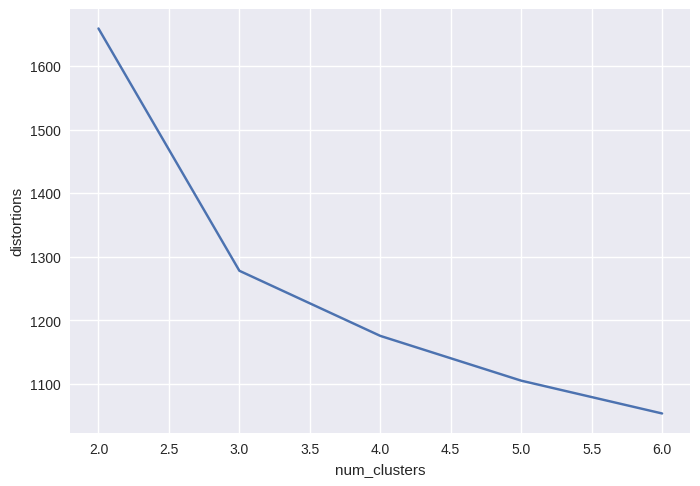

In [30]:
from sklearn.cluster import KMeans

distortions = []
num_clusters = range(2, 7)
for i in num_clusters:
  kmeans = KMeans(n_clusters=i).fit(data_scaled)
  centroids = kmeans.cluster_centers_
  distortion = kmeans.inertia_  # Сумма квадратов расстояний от выборок до центра их ближайшего кластера, взвешенная по весам выборок
  distortions.append(distortion)
elbow_df = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})
sns.lineplot(x='num_clusters', y='distortions', data=elbow_df)

In [54]:
kmeans = KMeans(n_clusters=3).fit(data_scaled)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print("centroids ", centroids)
print("labels ", labels)

centroids  [[ 0.83523208 -0.30380968  0.36470604 -0.61019129  0.5775868   0.88523736
   0.97781956 -0.56208965  0.58028658  0.17106348  0.47398365  0.77924711
   1.12518529]
 [ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [-0.92607185 -0.39404154 -0.49451676  0.17060184 -0.49171185 -0.07598265
   0.02081257 -0.03353357  0.0582655  -0.90191402  0.46180361  0.27076419
  -0.75384618]]
labels  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 0 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.predict()  # передать 13 параметров

TypeError: ignored

### Силуэтный анализ (Silhouette score)

Silhouette score используется для оценки качества кластеров, созданных с помощью алгоритмов кластеризации, таких как K-Means, с точки зрения того, насколько хорошо образцы кластеризуются с другими образцами, похожими друг на друга. Показатель Silhouette score рассчитывается для каждого образца из разных кластеров. Чтобы рассчитать показатель Silhouette для каждого наблюдения/точки данных, необходимо определить следующие расстояния для каждого наблюдения, принадлежащего ко всем кластерам:
* Среднее расстояние между наблюдением и всеми другими точками данных в том же кластере. Это расстояние также можно назвать **средним внутрикластерным расстоянием**. Здесь среднее расстояние обозначено как `a`
* Среднее расстояние между наблюдением и всеми другими точками данных следующего ближайшего кластера. Это расстояние также можно назвать **средним расстоянием между ближайшими кластерами**. Здесь среднее расстояние обозначено как `b`

Силуэтный балл $S$ для каждого образца рассчитывается по следующей формуле:

$$S = \frac{(b - a)}{max(a, b)}$$

Значение показателя Silhouette варьируется от -1 до 1. Если показатель равен 1, то кластер является плотным и хорошо разделенным по сравнению с другими кластерами. Значение, близкое к 0, представляет перекрывающиеся кластеры с выборками, расположенными очень близко к границе принятия решения соседних кластеров. Отрицательное значение [-1, 0] указывает на то, что образцы могли быть отнесены к неправильным кластерам.

Пакет Python Sklearn поддерживает следующие методы оценки коэффициентов силуэта:
* `silhouette_score` (sklearn.metrics) для набора данных используется для измерения среднего значения коэффициента силуэта для каждой выборки, принадлежащей к различным кластерам.
* `silhouette_samples` (sklearn.metrics) предоставляет оценки коэффициента силуэта для каждой выборки из разных кластеров.

In [33]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate Silhoutte Score
score = silhouette_score(data_scaled, kmeans.labels_, metric='euclidean')

# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.285


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.26831340971052126
For n_clusters = 3 The average silhouette_score is : 0.2848589191898987


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.24519129323772165
For n_clusters = 5 The average silhouette_score is : 0.23223087806001866


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.23533337693317755


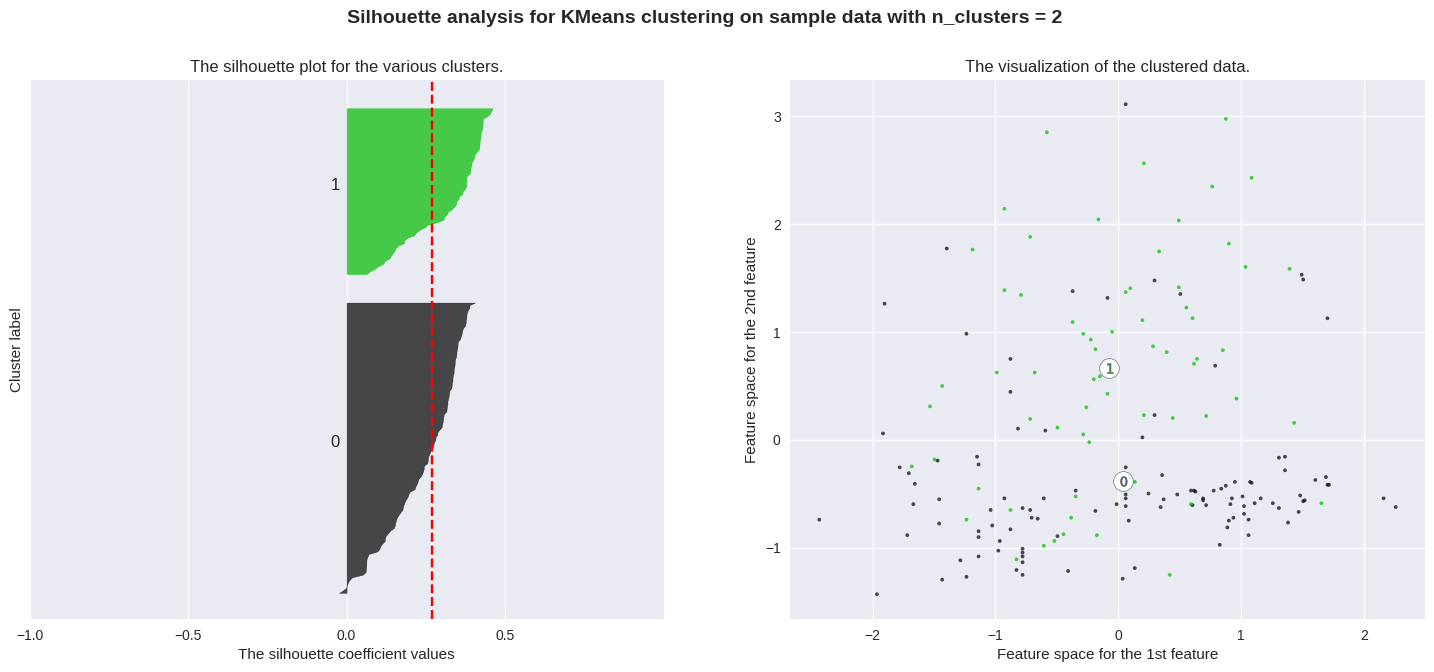

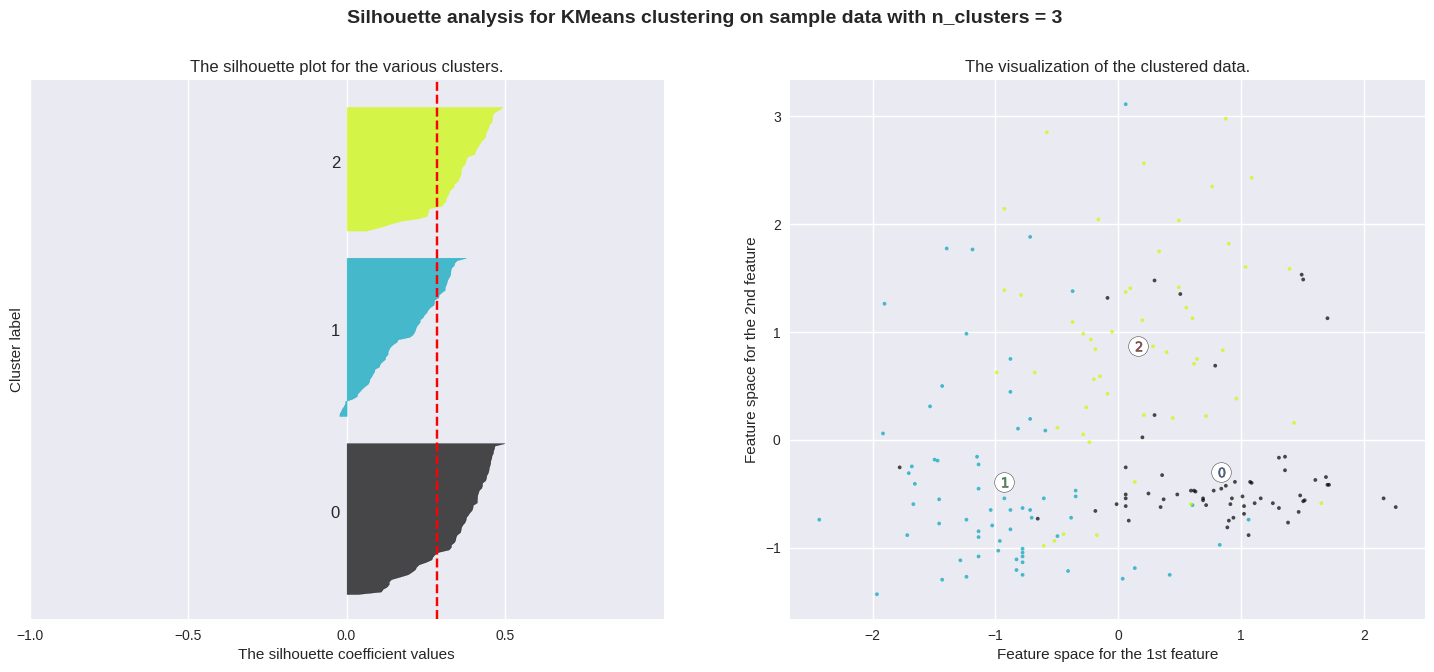

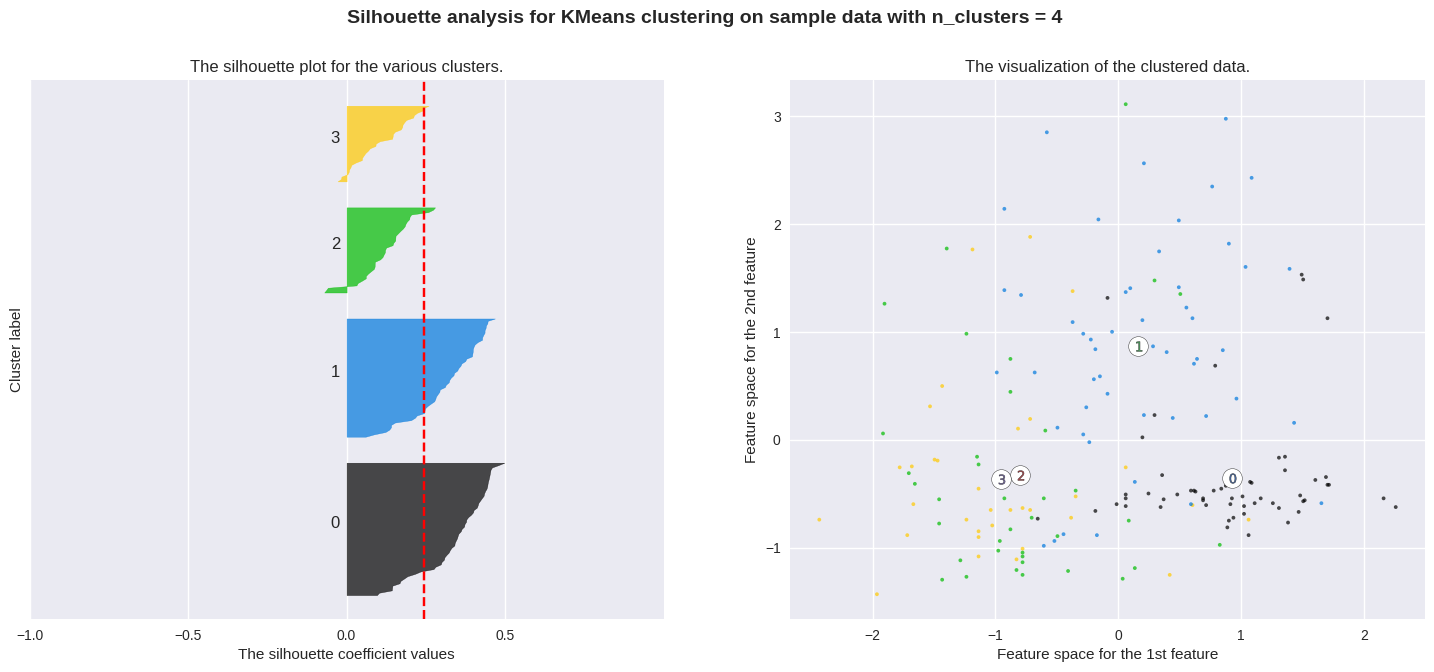

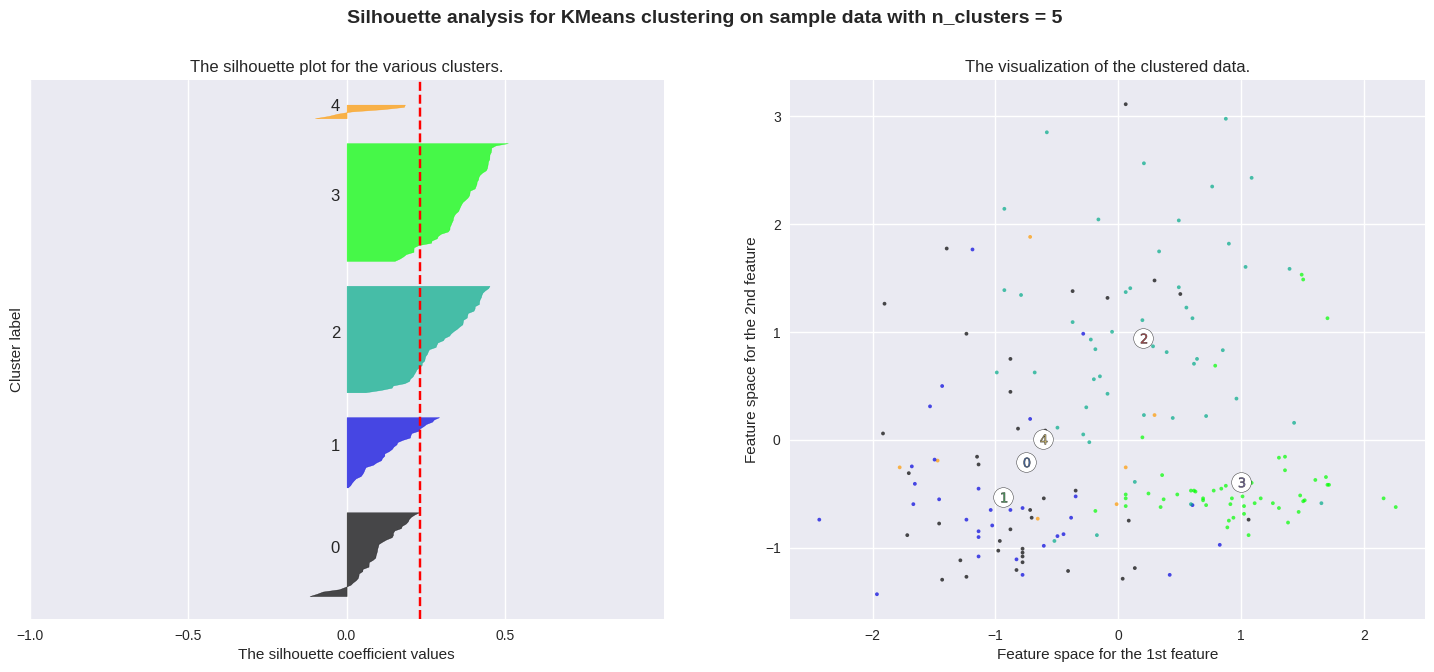

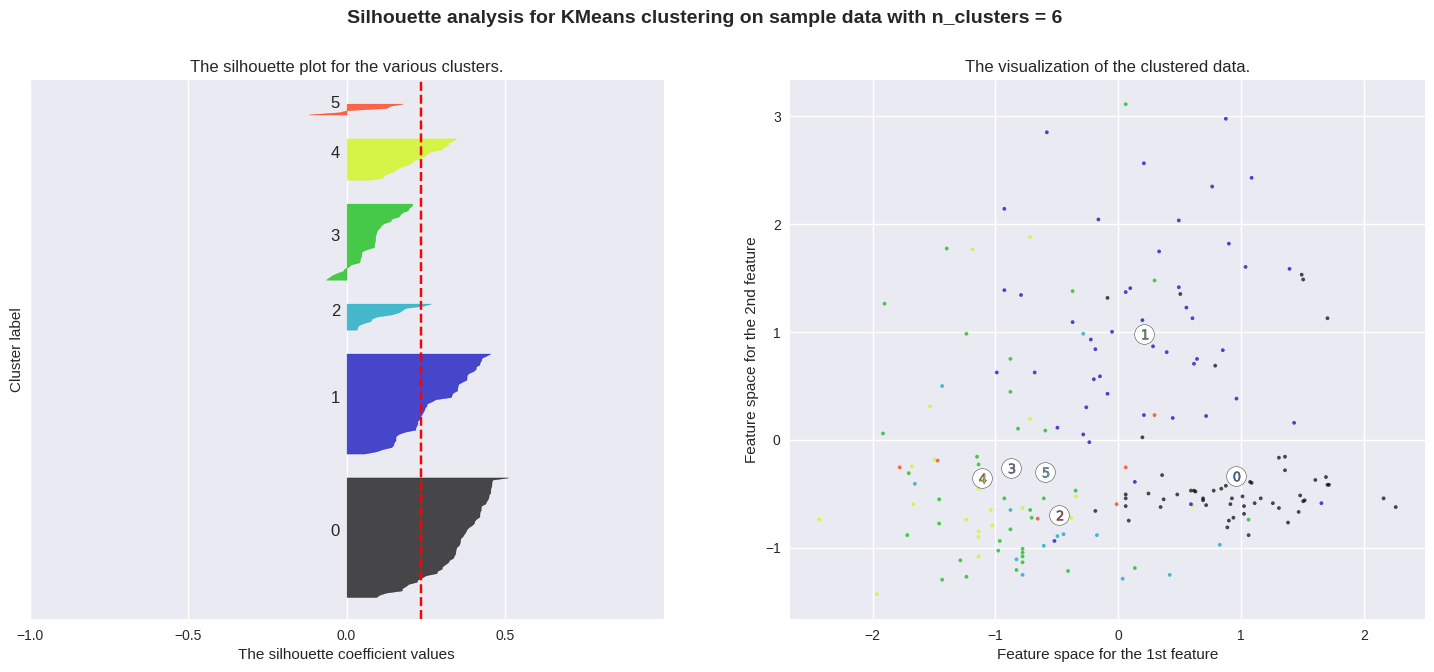

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


interest_numb_of_clusters = list(range(2, 7))
kmeanss = []

for n_clusters in interest_numb_of_clusters:
    # картинка с 1 строкой и 2 столбцами
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1-й подсюжет - это силуэтный сюжет
    # Коэффициент силуэта может варьироваться от -1, 1
    ax1.set_xlim([-1, 1])
    # (N_clusters + 1) * 10 для вставки пробела между силуэтами
    # графики отдельных кластеров, чтобы четко их разграничить.
    ax1.set_ylim([0, data_scaled.shape[0] + (n_clusters + 1) * 10])

    # Инициализируем кластеризатор значением n_clusters и случайным генератором
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_scaled)
    kmeanss.append(clusterer)

    # Silhouette_score дает среднее значение для всех образцов.
    # Это дает представление о плотности и разделении сформированных
    # clusters
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Вычислить оценки силуэта для каждого образца
    sample_silhouette_values = silhouette_samples(data_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Сложить оценки силуэтов для образцов, принадлежащих кластеру i, и отсортировать их
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Обозначить графики силуэтов номерами кластеров посередине
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Вычислить новый y_lower для следующего графика
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Вертикальная линия для средней оценки силуэта всех значений
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Очистить метки / отметки оси y
    ax1.set_xticks(np.arange(-1, 1, 0.5))

    # 2-й график, показывающий фактические сформированные кластеры
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_scaled.iloc[:, 0], data_scaled.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Маркировка кластеров
    centers = clusterer.cluster_centers_
    # Рисуем белые круги в центрах кластеров
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Значения n_clusters 2, 4, 5, 6 выглядят неоптимальными для данных по следующим причинам:
1. Наличие кластеров с оценками силуэта ниже среднего
2. Большие колебания в размерах графиков силуэтов.

Значение 3 для n_clusters выглядит оптимальным. Оценка силуэта для каждого кластера выше средней оценки силуэта. Колебания в размерах также схожи. Толщина силуэтного графика, представляющего каждый кластер, также является решающим фактором. Таким образом, можно выбрать оптимальное количество кластеров: 3.

# Методы понижения размерности
Здесь используются для визуализации многомерного результата на плоскости

## [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)

In [78]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(data_scaled)
X = pca.transform(data_scaled)
X[:5]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082]])

In [79]:
clusters_x_y = pd.DataFrame(X, columns=['X', 'Y'])
clusters_x_y.head()

X         Y
0  3.316751 -1.443463
1  2.209465  0.333393
2  2.516740 -1.031151
3  3.757066 -2.756372
4  1.008908 -0.869831

In [80]:
labels = pd.DataFrame(labels, columns=['label'])
dfs = [clusters_x_y, labels]
final_df = pd.concat(dfs, axis=1)
final_df

X         Y  label
0    3.316751 -1.443463      0
1    2.209465  0.333393      0
2    2.516740 -1.031151      0
3    3.757066 -2.756372      0
4    1.008908 -0.869831      0
..        ...       ...    ...
173 -3.370524 -2.216289      1
174 -2.601956 -1.757229      1
175 -2.677839 -2.760899      1
176 -2.387017 -2.297347      1
177 -3.208758 -2.768920      1

[178 rows x 3 columns]

In [81]:
pca = PCA(n_components=2)
pca.fit(centroids)
centroids_pca = pca.transform(centroids)
centroids_pca

array([[-2.34647256, -1.11101404],
       [ 2.66955749, -0.75117965],
       [-0.32308492,  1.86219369]])

In [82]:
import matplotlib
matplotlib.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

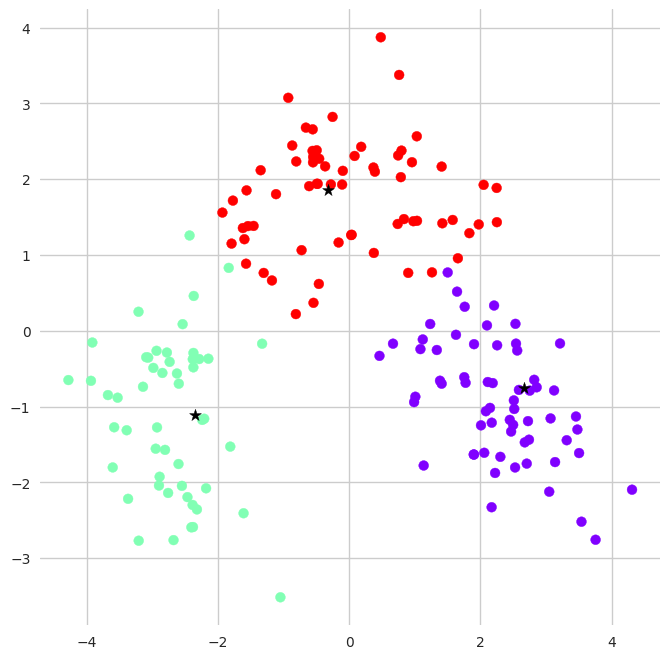

In [83]:
plt.figure(figsize=(8, 8))

plt.scatter(final_df["X"], final_df["Y"], c=final_df["label"], cmap='rainbow', s = 50)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='black', s=80, marker="*")
plt.show()

### TSNE

In [65]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='random')
X = tsne.fit_transform(data_scaled)
X[:5]

array([[ -4.4429574, -11.423664 ],
       [ -4.5994606,  -7.3470206],
       [ -8.506479 ,  -9.141033 ],
       [ -7.3752284, -11.8265085],
       [ -9.369151 ,  -5.072288 ]], dtype=float32)

In [66]:
clusters_x_y = pd.DataFrame(X, columns=['X', 'Y'])
clusters_x_y.head()

X          Y
0 -4.442957 -11.423664
1 -4.599461  -7.347021
2 -8.506479  -9.141033
3 -7.375228 -11.826509
4 -9.369151  -5.072288

In [67]:
labels = pd.DataFrame(labels, columns=['label'])
dfs = [clusters_x_y, labels]
final_df2 = pd.concat(dfs, axis=1)
final_df2

X          Y  label
0    -4.442957 -11.423664      0
1    -4.599461  -7.347021      0
2    -8.506479  -9.141033      0
3    -7.375228 -11.826509      0
4    -9.369151  -5.072288      0
..         ...        ...    ...
173   9.650697  10.074965      1
174   8.500504  11.267900      1
175   7.232568  12.291588      1
176   7.739105  12.331764      1
177  10.019490  11.577741      1

[178 rows x 3 columns]

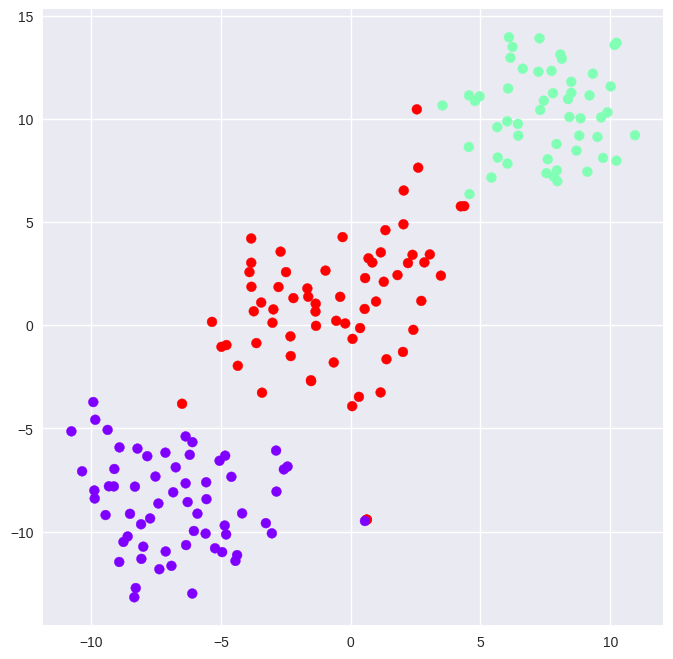

In [68]:
plt.figure(figsize=(8, 8))

plt.scatter(final_df2["X"], final_df2["Y"], c=final_df2["label"], cmap='rainbow', s = 50)
plt.show()

# Обнаружение выбросов с помощью [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)
DBSCAN является более сложным, чем k-means, но автоматически угадывает кол-во кластеров и указывает на странные данные, которые плохо вписываются в любой класс (выбросы).
```python
DBSCAN(eps,  # максимальное расстояние между двумя наблюдениями, которое позволяет им быть частью одной и той же окрестности
       min_sample)  # минимальное кол-во наблюдений в окрестности, которые превращают их в центральную точку
```

In [84]:
from sklearn.cluster import DBSCAN
from collections import Counter

outlier_detection = DBSCAN(eps=1.45, min_samples=40)
clusters = outlier_detection.fit_predict(final_df)
print(Counter(outlier_detection.labels_))

Counter({0: 60, 1: 60, 2: 42, -1: 16})


In [85]:
final_df[outlier_detection.labels_ == -1]

X         Y  label
3    3.757066 -2.756372      0
14   4.312784 -2.095976      0
61  -1.836250  0.829984      1
66   2.248507  1.884592      2
68  -0.812805  0.220514      2
96  -0.543953  0.368927      2
98   2.251909  1.432741      2
115  0.482074  3.871784      2
118 -2.433013  1.257141      1
130 -1.327102 -0.170389      1
134 -2.369869  0.459635      1
136 -3.915754 -0.154583      1
146 -4.280639 -0.649671      1
158 -1.048182 -3.515090      1
159 -1.609912 -2.406638      1
170 -3.211617  0.251249      1

Text(0.5, 1.0, 'DBSCAN for Outlier Detection')

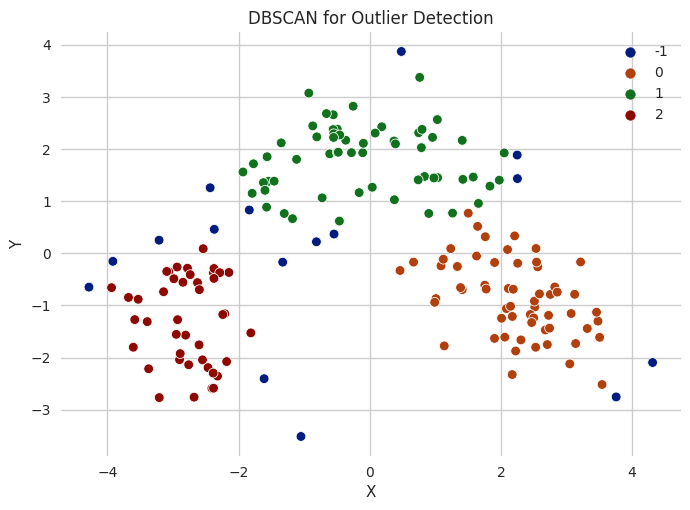

In [86]:
fig = plt.figure()
sns.set_style("whitegrid")
colors = outlier_detection.labels_

sns.scatterplot(data=final_df, x="X", y="Y", hue=colors, palette="dark")
plt.title("DBSCAN for Outlier Detection")

# Препроцессинг, пайплайн

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

nkm = Pipeline([('prep', StandardScaler()), ('clusterer', KMeans(3))])
nkm.fit(data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('prep', StandardScaler()),
                ('clusterer', KMeans(n_clusters=3))])

In [95]:
print(nkm['prep'].transform(data).shape)
print(nkm['clusterer'].transform(data).shape)

(178, 13)
(178, 3)


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [96]:
final_df3 = pd.DataFrame(PCA(n_components=2).fit_transform(nkm['prep'].transform(data)))
final_df3['cluster']=nkm['clusterer'].labels_
final_df3

0         1  cluster
0    3.316751 -1.443463        2
1    2.209465  0.333393        2
2    2.516740 -1.031151        2
3    3.757066 -2.756372        2
4    1.008908 -0.869831        2
..        ...       ...      ...
173 -3.370524 -2.216289        0
174 -2.601956 -1.757229        0
175 -2.677839 -2.760899        0
176 -2.387017 -2.297347        0
177 -3.208758 -2.768920        0

[178 rows x 3 columns]

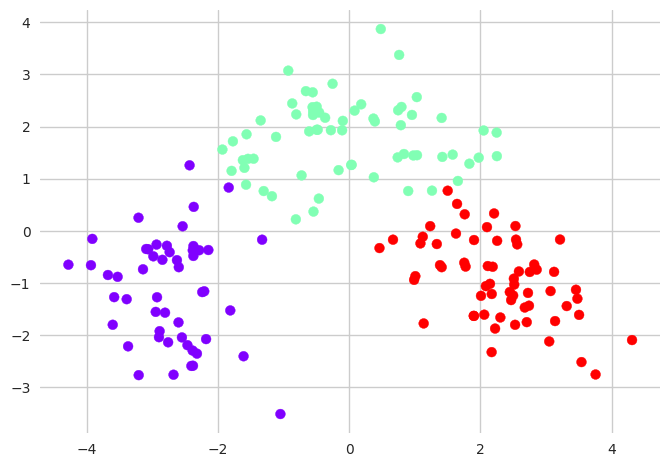

In [100]:
plt.scatter(final_df3[0], final_df3[1], c=final_df3["cluster"], cmap='rainbow', s = 50)
plt.show()

# Нелинейный пример

In [101]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal

Na = 2000
Nb = 2000
a = pd.DataFrame({'distance': np.random.randn(Na)*10 + 130, 'angle': np.random.rand(Na) * 2*np.pi})
b = pd.DataFrame({'distance': np.random.randn(Nb)*10 + 40, 'angle': np.random.rand(Nb) * 2*np.pi})
a['class'] = 'a'
b['class'] = 'b'
ring = pd.concat([a, b])
ring['x1'] = ring.distance * np.cos(ring.angle)
ring['x2'] = ring.distance * np.sin(ring.angle)
Xr = ring[['x1', 'x2']]
ring.sample(5)

distance     angle class         x1          x2
75     41.145797  6.190465     b  40.969056   -3.809603
702    44.826396  6.256154     b  44.810021   -1.211555
1070  117.005702  4.250234     a -52.170254 -104.731079
960    55.902643  3.110686     b -55.875944    1.727515
1797   50.005275  2.640476     b -43.856961   24.022790

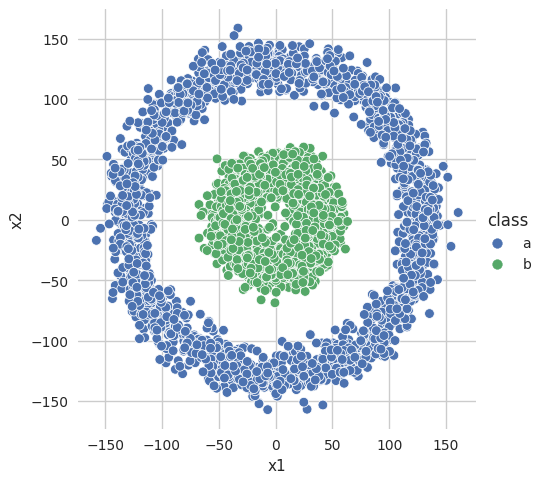

In [102]:
sns.relplot(x='x1', y='x2', hue='class', data=ring)

In [103]:
model = KMeans(2)
model.fit(Xr)
model

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

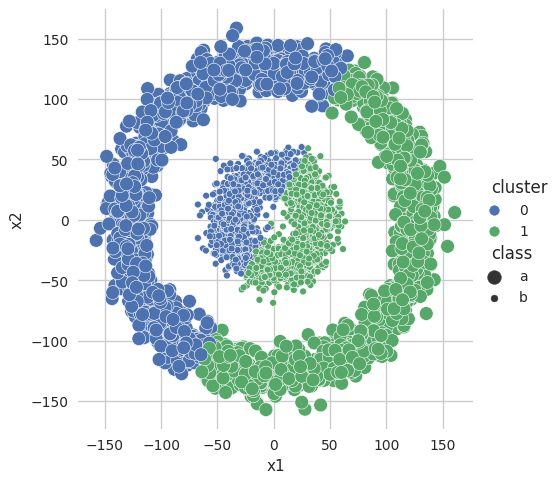

In [104]:
ring['cluster']=model.labels_
sns.relplot(x='x1', y='x2', hue='cluster', size='class', data=ring)

# Домашнее задание 1
Применить другую модель, подходящую для кластеризации нелинейного примера.

### Mnist
На какие кластеры разбивается множество рукописных цифр?

In [131]:
import pandas as pd
mnist_train = pd.read_csv('/content/sample_data/mnist_train_small.csv', header=None)
mnist_test = pd.read_csv('/content/sample_data/mnist_test.csv', header=None)

In [132]:
X_mnist = mnist_train.loc[:, 1:]

In [133]:
from sklearn.cluster import MiniBatchKMeans, AgglomerativeClustering
mnist_model = MiniBatchKMeans(10)
mnist_model.fit(X_mnist)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(n_clusters=10)

In [134]:
mnist_cluster = mnist_train[[0]].rename(columns={0: 'target'})
mnist_cluster['cluster'] = mnist_model.labels_
mnist_cluster

target  cluster
0           6        3
1           5        4
2           7        0
3           9        3
4           5        7
...       ...      ...
19995       0        7
19996       1        1
19997       2        6
19998       9        8
19999       5        7

[20000 rows x 2 columns]

In [135]:
mnist_cluster['number'] = 1
mnist_cluster.groupby(['target', 'cluster']).sum()

number
target cluster        
0      0             3
       1             3
       2          1352
       3            14
       4            94
...                ...
9      5            45
       6            10
       7            16
       8           586
       9             1

[92 rows x 1 columns]

In [136]:
import numpy as np

cluster_counts = mnist_cluster.pivot_table('number', index='target', columns='cluster', aggfunc=np.sum, fill_value=0.)
cluster_counts

cluster     0     1     2    3     4    5     6    7     8     9
target                                                          
0           3     3  1352   14    94    5   236  200     6    49
1           0  1416     0    2     5  814     1    0     3     2
2          33   120    16   26    26  394  1047  108    24   195
3          14   130     5   41  1118   55    99  516    27    16
4        1080    65     1  566     0   68    12    0   102    30
5         180   194    15   70   575  150    32  398   122    25
6           8   142    19   30    20   69    25   26     0  1700
7          59   116     4  499     0   86     8    1  1353     0
8          85   104     3   26   320  616   199  405   144    10
9         641    74     8  622    20   45    10   16   586     1

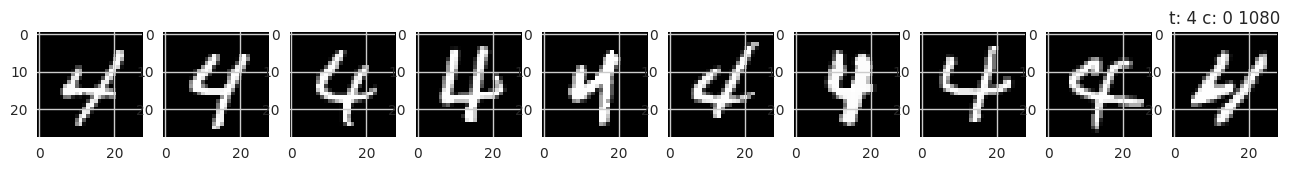

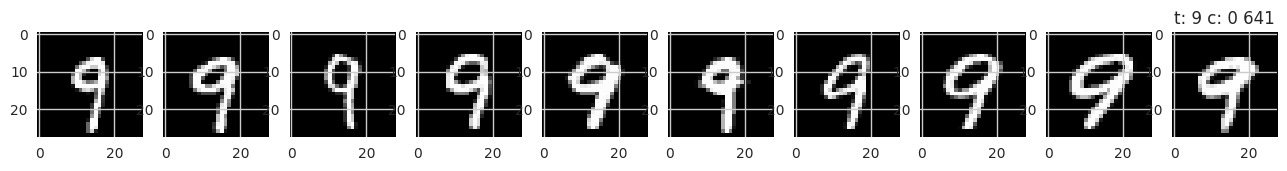

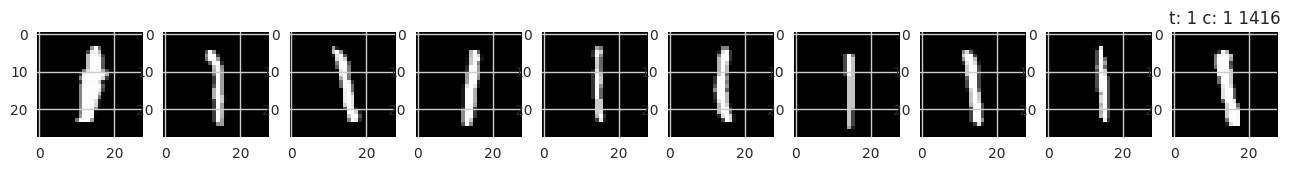

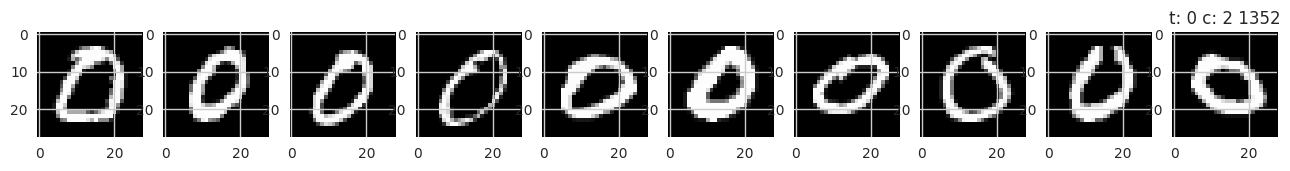

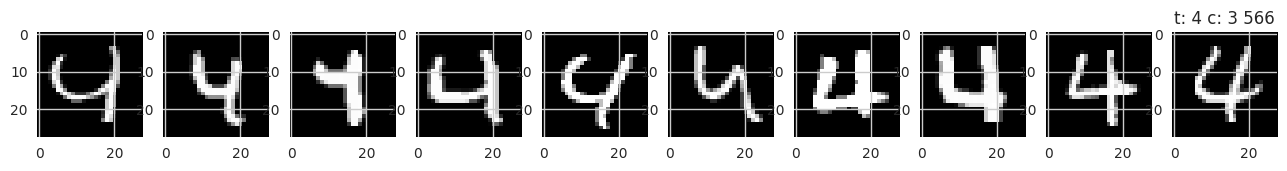

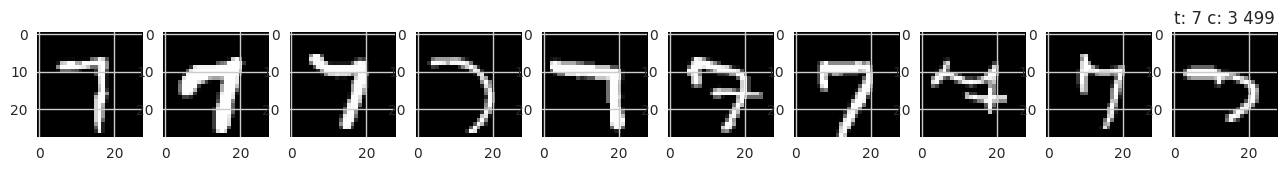

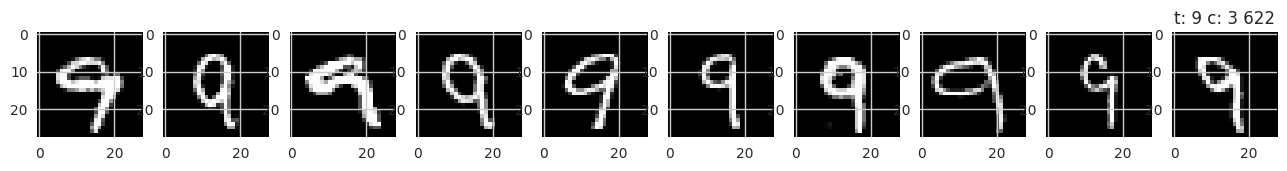

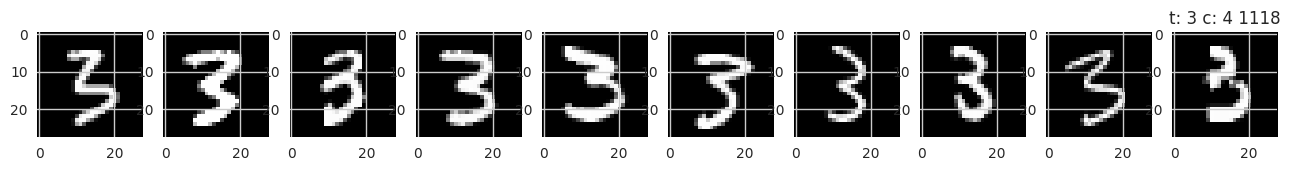

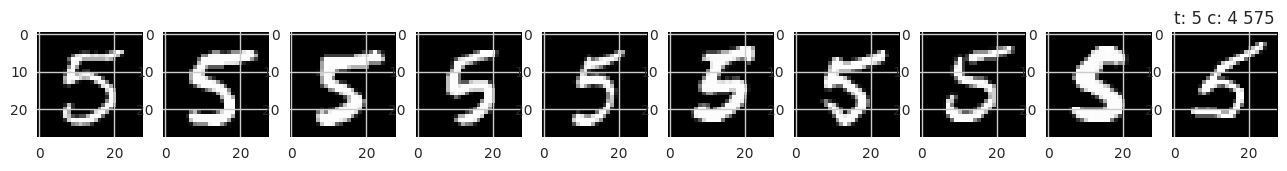

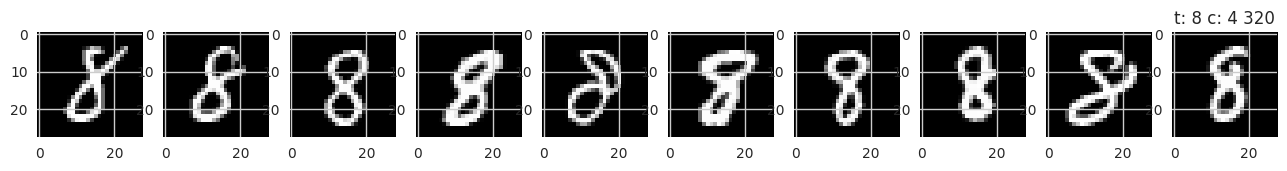

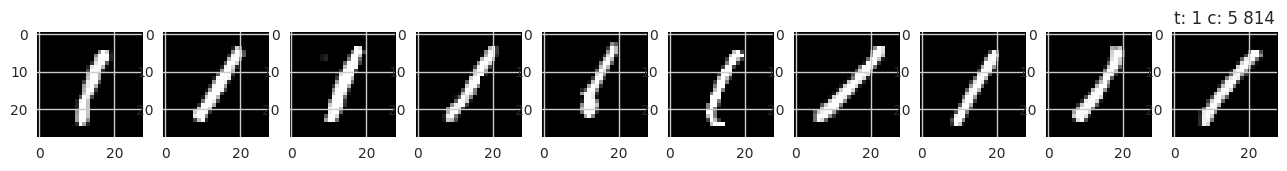

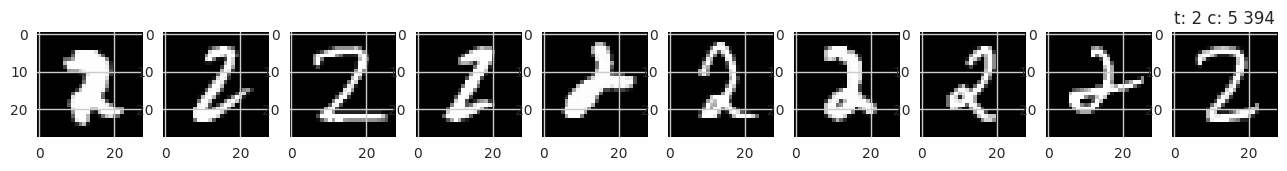

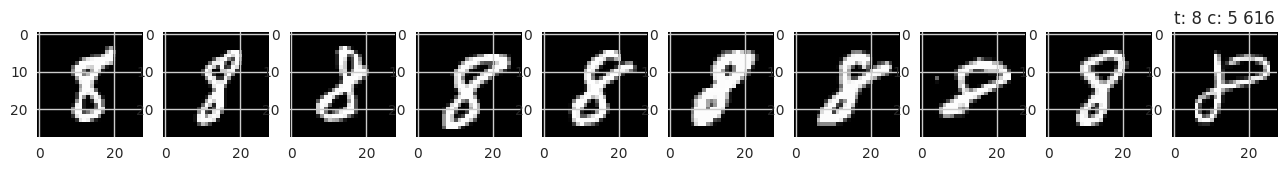

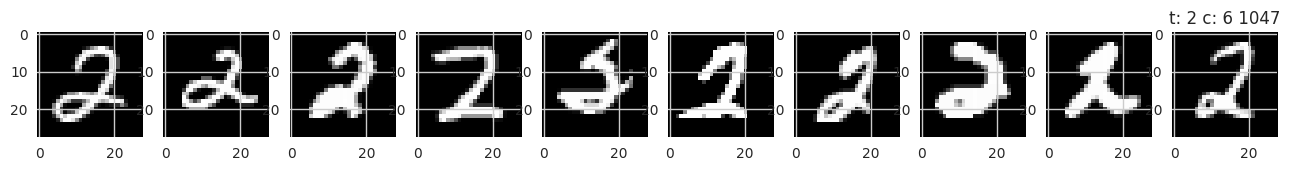

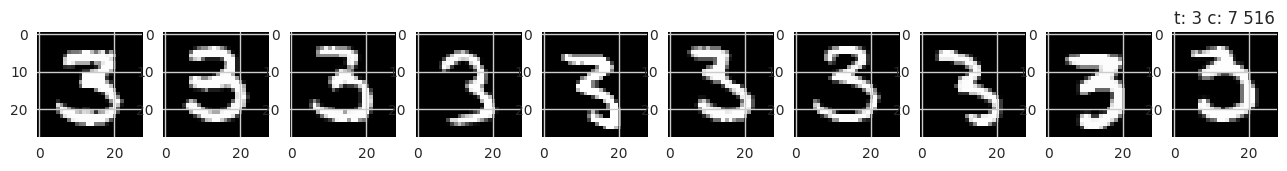

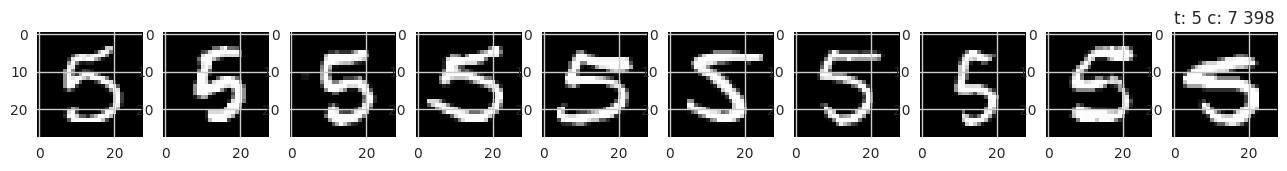

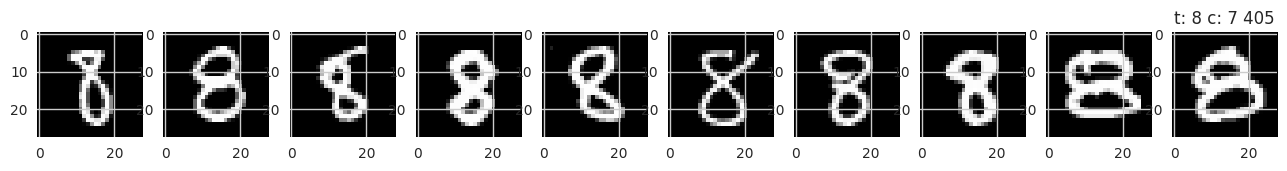

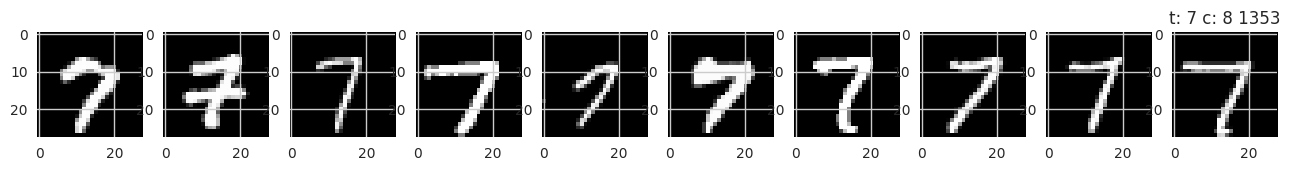

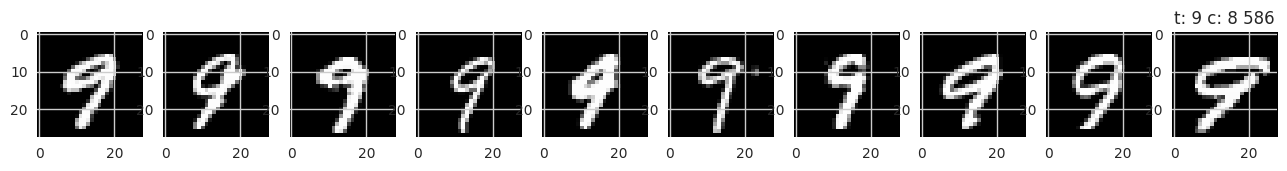

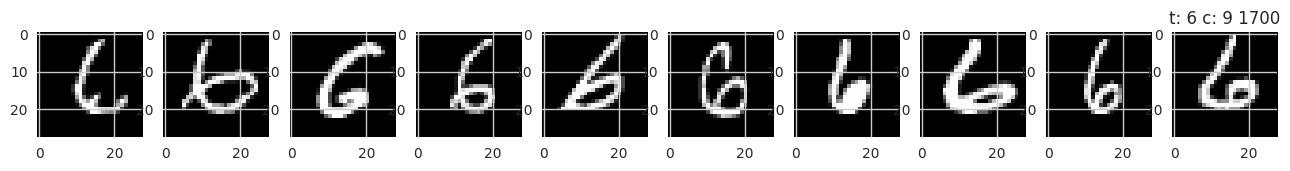

In [137]:
from matplotlib import pyplot as plt

n_ = 10
for cluster in range(10):
  for target in range(10):
    sample = X_mnist[(mnist_cluster.target==target) & (mnist_cluster.cluster==cluster)].iloc[:n_]
    if(cluster_counts.loc[target, cluster] > 300):
      fig, axes = plt.subplots(1, n_, figsize=(16, 4))
      plt.title(f't: {target} c: {cluster} {cluster_counts.loc[target, cluster]}')
      for i in range(n_):
        img = sample.values[i].reshape((28, 28))
        axes[i].imshow(img, cmap='gray')


## Кластеризация на графах

### Графы с весом на рёбрах (расстоянием)

['A', 'B', 'C', 'D']

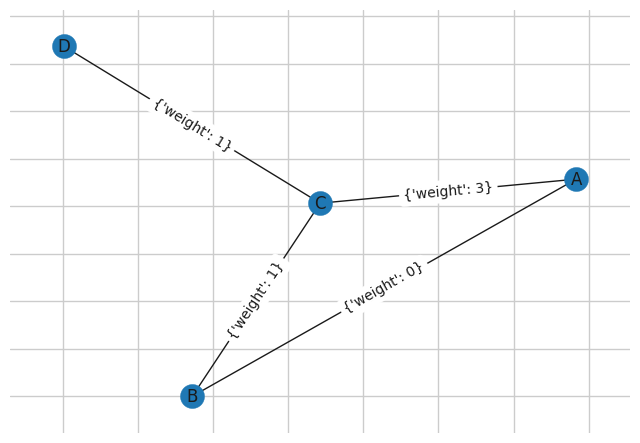

In [120]:
import networkx as nx

g = nx.Graph(directed=False)
g.add_edge('A', 'B', weight=0)
g.add_edge('B', 'C', weight=1)
g.add_edge('C', 'D', weight=1)
g.add_edge('A', 'C', weight=3)
pos=nx.spring_layout(g)
nx.draw_networkx(g, pos)
nx.draw_networkx_edge_labels(g, pos)
nx.shortest_path(g, 'A', 'D', weight='weight')

In [121]:
nx.to_pandas_edgelist(g)

source target  weight
0      A      B       0
1      A      C       3
2      B      C       1
3      C      D       1

In [122]:
nx.to_scipy_sparse_array(g).todense()

array([[0, 0, 3, 0],
       [0, 0, 1, 0],
       [3, 1, 0, 1],
       [0, 0, 1, 0]])

In [123]:
nx.to_pandas_adjacency(g)

A    B    C    D
A  0.0  0.0  3.0  0.0
B  0.0  0.0  1.0  0.0
C  3.0  1.0  0.0  1.0
D  0.0  0.0  1.0  0.0

### Кластеры на графе

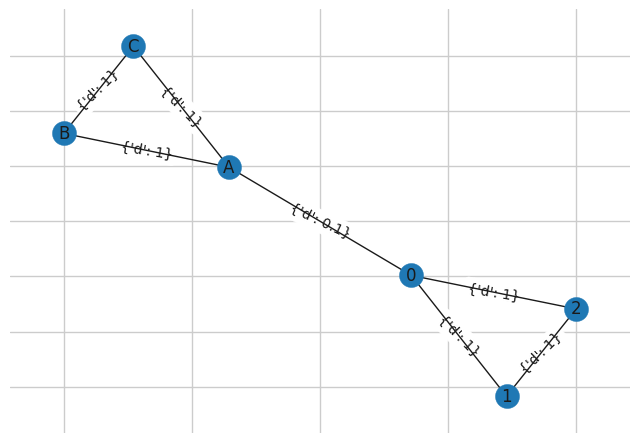

In [124]:
g = nx.from_edgelist([('0', '1', {'d': 1}),
                      ('0', '2', {'d': 1}),
                      ('1', '2', {'d': 1}),
                      ('A', 'B', {'d': 1}),
                      ('A', 'C', {'d': 1}),
                      ('B', 'C', {'d': 1}),
                      ('0', 'A', {'d': 0.1})])
pos=nx.spring_layout(g)
nx.draw_networkx_edge_labels(g, pos)
nx.draw_networkx(g, pos)

In [125]:
X = nx.to_pandas_adjacency(g, weight='d')
X

0    1    2    A    B    C
0  0.0  1.0  1.0  0.1  0.0  0.0
1  1.0  0.0  1.0  0.0  0.0  0.0
2  1.0  1.0  0.0  0.0  0.0  0.0
A  0.1  0.0  0.0  0.0  1.0  1.0
B  0.0  0.0  0.0  1.0  0.0  1.0
C  0.0  0.0  0.0  1.0  1.0  0.0

In [129]:
from sklearn.cluster import AffinityPropagation

model = AffinityPropagation(affinity='precomputed')
X = nx.to_pandas_adjacency(g, weight='d')
model.fit(X)
X['cluster'] = model.labels_
X

0    1    2    A    B    C  cluster
0  0.0  1.0  1.0  0.1  0.0  0.0        0
1  1.0  0.0  1.0  0.0  0.0  0.0        0
2  1.0  1.0  0.0  0.0  0.0  0.0        0
A  0.1  0.0  0.0  0.0  1.0  1.0        1
B  0.0  0.0  0.0  1.0  0.0  1.0        1
C  0.0  0.0  0.0  1.0  1.0  0.0        1

[AffinityPropagation (AP)](https://scikit-learn.org/stable/modules/clustering.html#affinity-propagation) представляет собой алгоритм кластеризации, основанный на концепции "передачи сообщений" между точками данных. В отличие от алгоритмов кластеризации, таких как k-средние, AffinityPropagation не требует определения или оценки количества кластеров перед запуском алгоритма. Подобно KMeans, AffinityPropagation находит "экземпляры", члены входного набора, которые являются репрезентативными для кластеров.

# Домашнее задание 2
1. Кластеризовать свой датасет любой моделью
  - скорее всего понадобятся pipeline и scaler
2. Визуализировать результаты кластеризации:
  - спроецировать датасет на плоскость с помощью TSNE
  - раскрасить кластеры